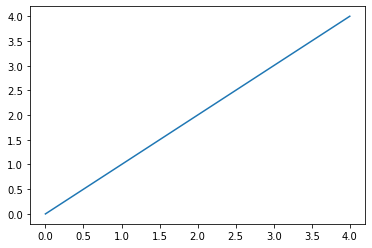

In [7]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(5))

# Importing libraries and dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# read dataset usin function read_csv()
df = pd.read_csv("L:/Pandas/Data-Analysis-in-Python-using-Pandas/Datasets/train.csv")
# reading the dataset in a dataframe using pandas


In [10]:
## Look at few top rows by using function head()
df.head(10) # This should pring just 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [11]:
# If we look at summary of numerical fields by using descirbe() function
df.describe() # Get summary of numerical variables
# describe function would provide count, mean, standard deviation, min, quartiles in its output . If you don't know basic statistics, please look at the Statistics folder & gain the basic.



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

In [12]:
# For the non-numrerical values (e.g Property Area, Credit History etc), We can look at frequency distribution to understand whether they make sense or not.
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Distribution Analysis

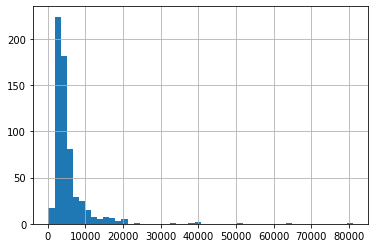

In [13]:
#Now that we are familiar with basic data characteristics, let us study distribution of various varibles.
#Let us start with numeric variables - namely ApplicantIncome & LoanAmout

df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to decipt the distribution clearly.

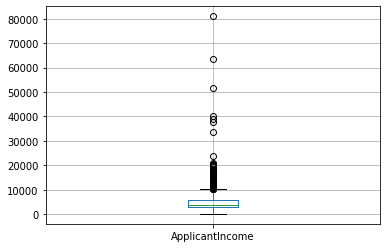

In [15]:
# Next we look at box plots to understand the distributions.

df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by education

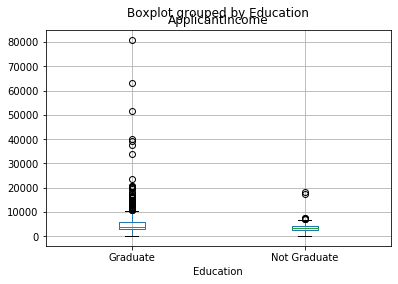

In [16]:
df.boxplot(column='ApplicantIncome', by= 'Education')

We can see that there is no substanial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.


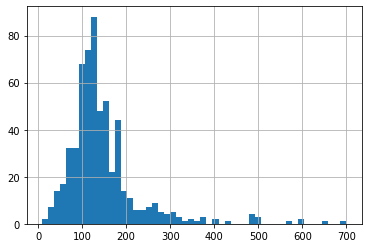

In [17]:
# Now, Let's look at the histogram and boxplot of LoanAmount
df['LoanAmount'].hist(bins=50)

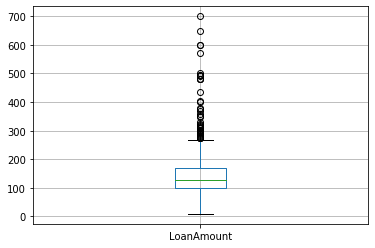

In [18]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values , while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

# Categorical variable analysis

Now that we understand distributions for ApplicantIncome and LoanIncome, let us understand categorical variables in more details. We will use excel style pivot table and cross-tabulation. For instance, let us look at the chances of getting a loan based on credit history. 

Note: Here loan status has been coded as 1 for YES & 0 for NO. So the mean represents the probablility of getting loan.


In [20]:
# Data manipulation techniques in Pandas

temp_1 = df ['Credit_History'].value_counts(ascending=True)
temp_2 =  df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print('Frequency Table for Credit History: ')
print (temp_1)

print ('\nProbility of getting loan for each Credit History Class: ')

print(temp_2)


Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History Class: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Now we can observe that we get a similar pivot_table like the MS Excel one. This can be plotted as bar chart using "matplotlib" library with following code:


Text(0.5, 1.0, 'Probability of getting loan by credit history')

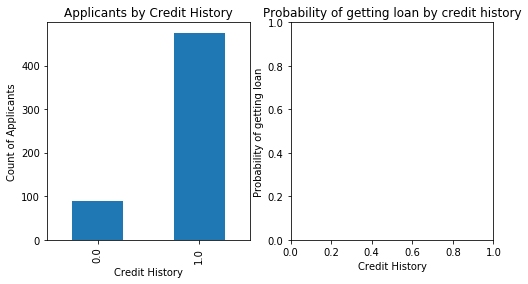

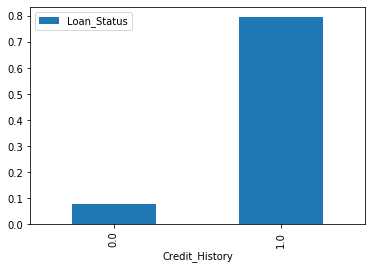

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
temp_1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp_2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")




This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area etc.

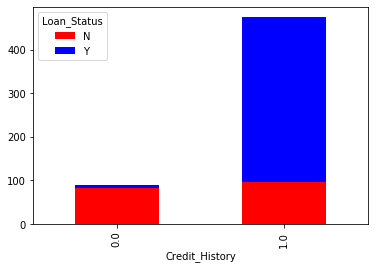

In [28]:
# Alternantely, these two plots can also be visualized by combining them in a stacked chart:

temp_3 = pd.crosstab ( df ['Credit_History'], df ['Loan_Status'])
temp_3.plot(kind='bar', stacked= True , color = ['red', 'blue'], grid=False)


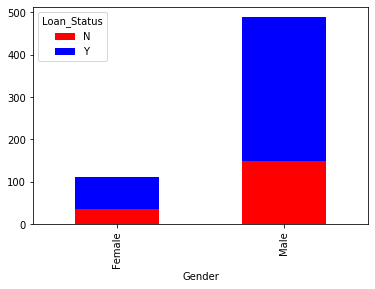

In [34]:
# Add Gender 

temp_4 = pd.crosstab (df ['Gender'], df ['Loan_Status'])
temp_4.plot(kind='bar', stacked= True , color = ['red', 'blue'], grid=False)


If you have not realized already, we have just created two basic classification algorithms here, one base on credit history, while other on 2 categorical vaariables (including gender).

We just saw how we can do exploratory analysis in Python using Pandas. I hope your love for pandas would have increased by now. 